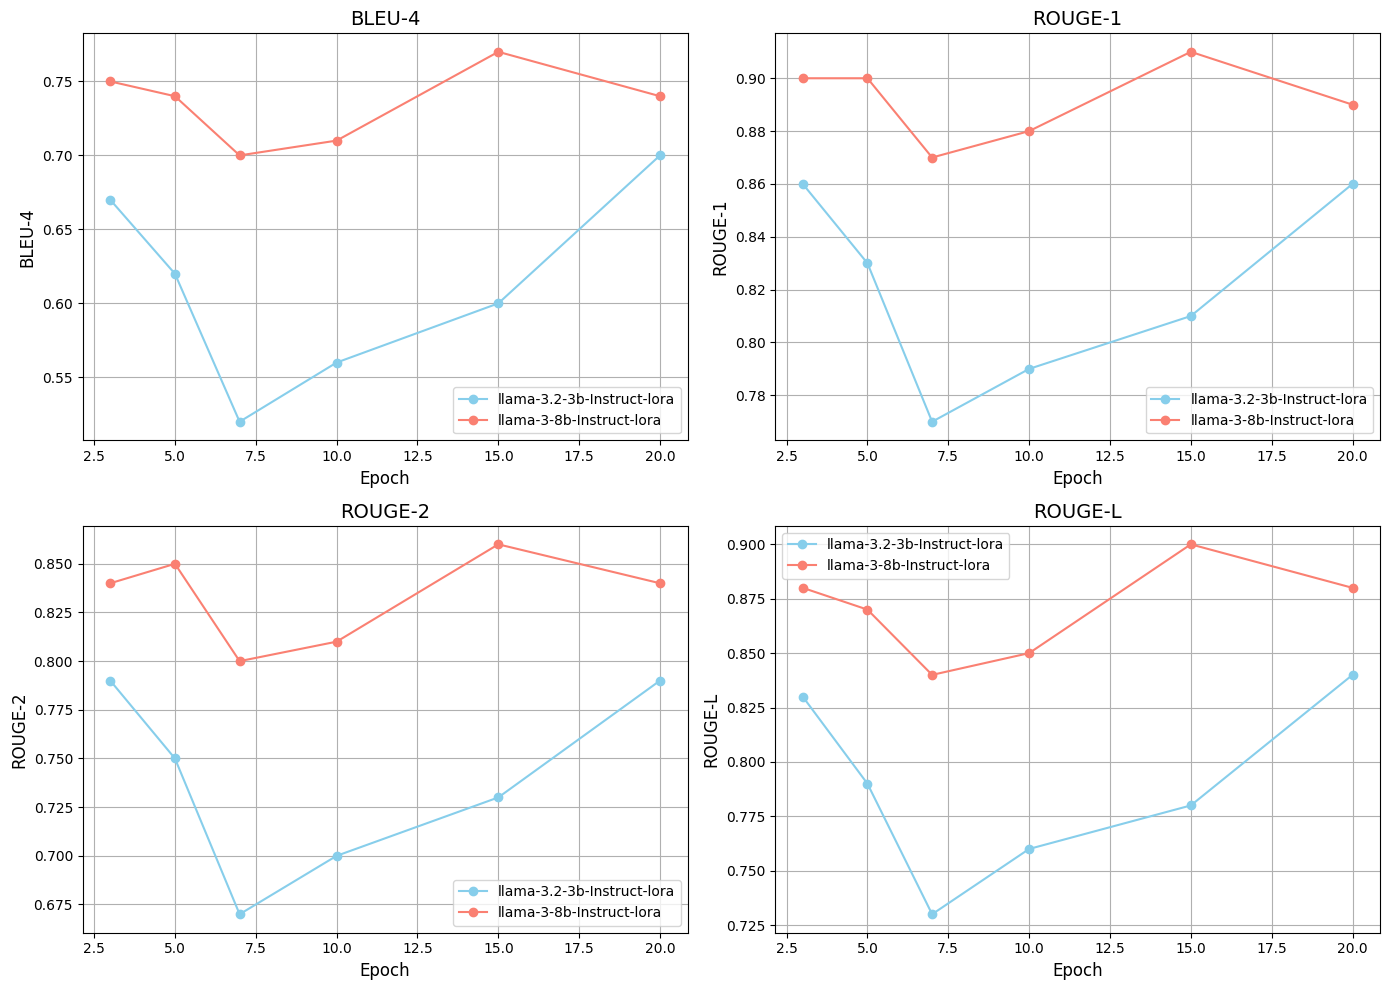

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 构造数据
data = {
    "Model": [
        "llama-3.2-3b-Instruct-lora"] * 6 +
        ["llama-3-8b-Instruct-lora"] * 6,
    "Epoch": [3, 5, 7, 10, 15, 20] * 2,
    "BLEU-4": [0.67, 0.62, 0.52, 0.56, 0.60, 0.70, 0.75, 0.74, 0.70, 0.71, 0.77, 0.74],
    "ROUGE-1": [0.86, 0.83, 0.77, 0.79, 0.81, 0.86, 0.90, 0.90, 0.87, 0.88, 0.91, 0.89],
    "ROUGE-2": [0.79, 0.75, 0.67, 0.70, 0.73, 0.79, 0.84, 0.85, 0.80, 0.81, 0.86, 0.84],
    "ROUGE-L": [0.83, 0.79, 0.73, 0.76, 0.78, 0.84, 0.88, 0.87, 0.84, 0.85, 0.90, 0.88],
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置颜色
colors = {
    "llama-3.2-3b-Instruct-lora": "skyblue",
    "llama-3-8b-Instruct-lora": "salmon"
}

# 准备图表
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["BLEU-4", "ROUGE-1", "ROUGE-2", "ROUGE-L"]

# 绘图
for ax, metric in zip(axs.flat, metrics):
    for model in df["Model"].unique():
        subset = df[df["Model"] == model]
        ax.plot(
            subset["Epoch"],
            subset[metric],
            label=model,
            marker='o',
            color=colors[model]
        )
    ax.set_title(metric, fontsize=14)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


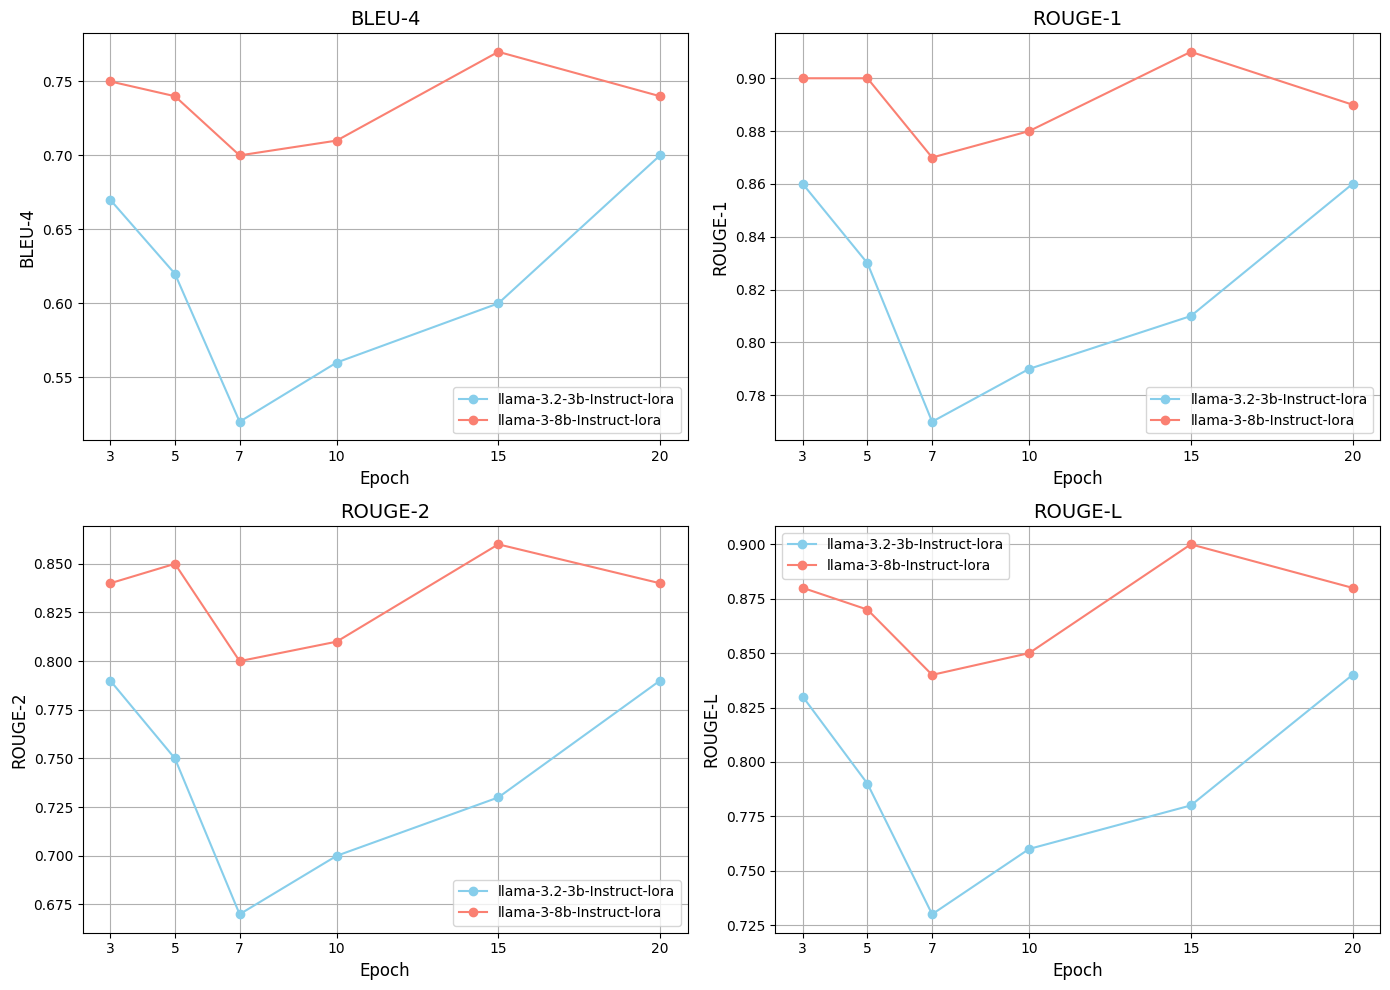

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# 构造数据
data = {
    "Model": [
        "llama-3.2-3b-Instruct-lora"] * 6 +
        ["llama-3-8b-Instruct-lora"] * 6,
    "Epoch": [3, 5, 7, 10, 15, 20] * 2,
    "BLEU-4": [0.67, 0.62, 0.52, 0.56, 0.60, 0.70, 0.75, 0.74, 0.70, 0.71, 0.77, 0.74],
    "ROUGE-1": [0.86, 0.83, 0.77, 0.79, 0.81, 0.86, 0.90, 0.90, 0.87, 0.88, 0.91, 0.89],
    "ROUGE-2": [0.79, 0.75, 0.67, 0.70, 0.73, 0.79, 0.84, 0.85, 0.80, 0.81, 0.86, 0.84],
    "ROUGE-L": [0.83, 0.79, 0.73, 0.76, 0.78, 0.84, 0.88, 0.87, 0.84, 0.85, 0.90, 0.88],
}

df = pd.DataFrame(data)

# 设置颜色
colors = {
    "llama-3.2-3b-Instruct-lora": "skyblue",
    "llama-3-8b-Instruct-lora": "salmon"
}

# Epoch值
epochs = [3, 5, 7, 10, 15, 20]

# 准备图表
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["BLEU-4", "ROUGE-1", "ROUGE-2", "ROUGE-L"]

# 绘图
for ax, metric in zip(axs.flat, metrics):
    for model in df["Model"].unique():
        subset = df[df["Model"] == model]
        ax.plot(
            subset["Epoch"],
            subset[metric],
            label=model,
            marker='o',
            color=colors[model]
        )
    ax.set_title(metric, fontsize=14)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(epochs)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig("bleu_rouge.png", dpi=300)
plt.show()


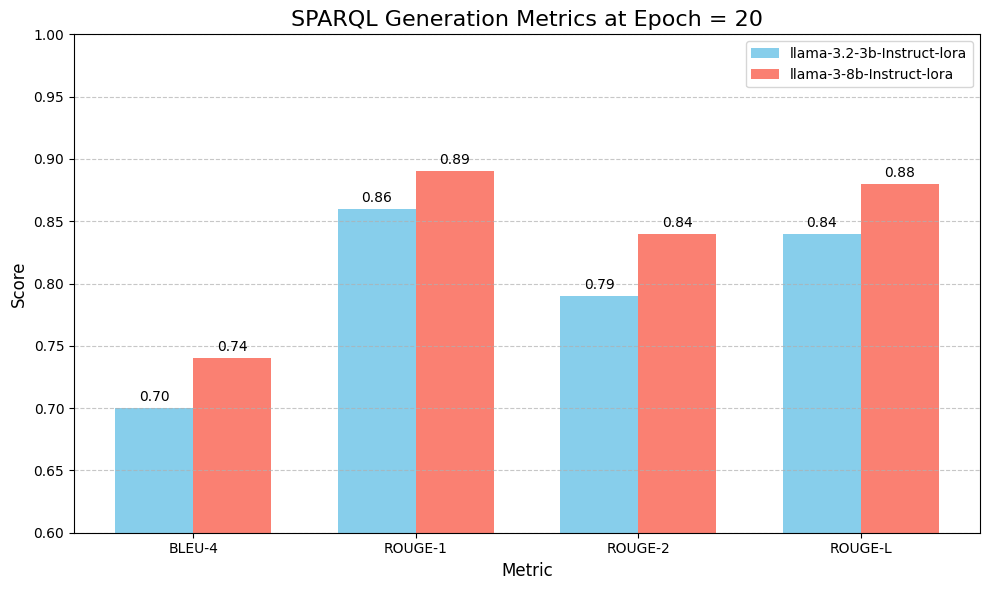

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 构造 epoch=20 的数据
data_20 = {
    "Metric": ["BLEU-4", "ROUGE-1", "ROUGE-2", "ROUGE-L"],
    "llama-3.2-3b-Instruct-lora": [0.70, 0.86, 0.79, 0.84],
    "llama-3-8b-Instruct-lora": [0.74, 0.89, 0.84, 0.88],
}

df = pd.DataFrame(data_20)

# 设置位置
metrics = df["Metric"]
x = np.arange(len(metrics))  # 4个指标的位置
width = 0.35  # 每个柱子的宽度

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱子
bar1 = ax.bar(x - width/2, df["llama-3.2-3b-Instruct-lora"], width, label='llama-3.2-3b-Instruct-lora', color='skyblue')
bar2 = ax.bar(x + width/2, df["llama-3-8b-Instruct-lora"], width, label='llama-3-8b-Instruct-lora', color='salmon')

# 添加标签和标题
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('SPARQL Generation Metrics at Epoch = 20', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.6, 1.0)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# 在柱子上标出数值
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# 保存图片
plt.tight_layout()
plt.savefig("bleu_rouge_epoch20_bar.png", dpi=300)
plt.show()
